### 

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 11 19:15:23 2020

@author1: Juan Diego Chang
@author2: Carlos Salazar
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from numpy import asarray
from numpy import savetxt

import os

import time
from scipy import stats

import warnings
import numpy as np
from numpy import nan
warnings.filterwarnings("ignore", category=RuntimeWarning) 

start = time.time() #Saves the begining time of the process

os.makedirs('GraficasProyDNN',exist_ok=True)


In [2]:
#==============================================================================
#LEER DATOS
#==============================================================================
fecha = '2022-11-26'

casos = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

sintomas = pd.read_csv('Confirmados por municipio, fecha de emisión de resultado del 2020-02-13 al '+fecha+'.csv')

poblaciones = pd.read_excel('PoblacionMunicipal.xlsx')

#==============================================================================
#ELIMINAR SIN DATO
#==============================================================================

casos = casos[casos.codigo_municipio != 99]

sintomas = sintomas[sintomas.codigo_municipio != 99]

codigoCasos = casos['codigo_municipio']

codigoSintomas = sintomas['codigo_municipio']

codigoPob = poblaciones['codigo_municipio']

faltanCasosMuni = np.array(list(set(casos.municipio).symmetric_difference(poblaciones.municipio)))
faltanCasosDepto = []
for i in range(len(faltanCasosMuni)):
    faltanCasosDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'departamento'].iloc[0])
faltanCasosCodigoMuni = []
for i in range(len(faltanCasosMuni)):
    faltanCasosCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'codigo_municipio'].iloc[0])
faltanCasosPob = []
for i in range(len(faltanCasosMuni)):
    faltanCasosPob.append(poblaciones.loc[poblaciones['municipio'] == faltanCasosMuni[i], 'poblacion'].iloc[0])
faltanCasosCodigoDepto = []
for i in range(len(faltanCasosMuni)):
    if faltanCasosDepto[i] == 'ALTA VERAPAZ':
        faltanCasosCodigoDepto.append(16)
    elif faltanCasosDepto[i] == 'BAJA VERAPAZ':
        faltanCasosCodigoDepto.append(15)
    elif faltanCasosDepto[i] == 'CHIMALTENANGO':
        faltanCasosCodigoDepto.append(4)
    elif faltanCasosDepto[i] == 'CHIQUIMULA':
        faltanCasosCodigoDepto.append(20)
    elif faltanCasosDepto[i] == 'EL PROGRESO':
        faltanCasosCodigoDepto.append(2)
    elif faltanCasosDepto[i] == 'ESCUINTLA':
        faltanCasosCodigoDepto.append(5)
    elif faltanCasosDepto[i] == 'GUATEMALA':
        faltanCasosCodigoDepto.append(1)
    elif faltanCasosDepto[i] == 'HUEHUETENANGO':
        faltanCasosCodigoDepto.append(13)
    elif faltanCasosDepto[i] == 'IZABAL':
        faltanCasosCodigoDepto.append(18)
    elif faltanCasosDepto[i] == 'JALAPA':
        faltanCasosCodigoDepto.append(21)
    elif faltanCasosDepto[i] == 'JUTIAPA':
        faltanCasosCodigoDepto.append(22)
    elif faltanCasosDepto[i] == 'PETEN':
        faltanCasosCodigoDepto.append(17)
    elif faltanCasosDepto[i] == 'QUETZALTENANGO':
        faltanCasosCodigoDepto.append(9)
    elif faltanCasosDepto[i] == 'QUICHE':
        faltanCasosCodigoDepto.append(14)
    elif faltanCasosDepto[i] == 'RETALHULEU':
        faltanCasosCodigoDepto.append(11)
    elif faltanCasosDepto[i] == 'SACATEPEQUEZ':
        faltanCasosCodigoDepto.append(3)
    elif faltanCasosDepto[i] == 'SAN MARCOS':
        faltanCasosCodigoDepto.append(12)
    elif faltanCasosDepto[i] == 'SANTA ROSA':
        faltanCasosCodigoDepto.append(6)
    elif faltanCasosDepto[i] == 'SOLOLA':
        faltanCasosCodigoDepto.append(7)
    elif faltanCasosDepto[i] == 'SUCHITEPEQUEZ':
        faltanCasosCodigoDepto.append(10)
    elif faltanCasosDepto[i] == 'TOTONICAPAN':
        faltanCasosCodigoDepto.append(8)
    elif faltanCasosDepto[i] == 'ZACAPA':
        faltanCasosCodigoDepto.append(19)

faltanSintomasMuni = np.array(list(set(sintomas.municipio).symmetric_difference(poblaciones.municipio)))
faltanSintomasDepto = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasDepto.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'departamento'].iloc[0])
faltanSintomasCodigoMuni = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasCodigoMuni.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'codigo_municipio'].iloc[0])
faltanSintomasPob = []
for i in range(len(faltanSintomasMuni)):
    faltanSintomasPob.append(poblaciones.loc[poblaciones['municipio'] == faltanSintomasMuni[i], 'poblacion'].iloc[0])
faltanSintomasCodigoDepto = []
for i in range(len(faltanSintomasMuni)):
    if faltanSintomasDepto[i] == 'ALTA VERAPAZ':
        faltanSintomasCodigoDepto.append(16)
    elif faltanSintomasDepto[i] == 'BAJA VERAPAZ':
        faltanSintomasCodigoDepto.append(15)
    elif faltanSintomasDepto[i] == 'CHIMALTENANGO':
        faltanSintomasCodigoDepto.append(4)
    elif faltanSintomasDepto[i] == 'CHIQUIMULA':
        faltanSintomasCodigoDepto.append(20)
    elif faltanSintomasDepto[i] == 'EL PROGRESO':
        faltanSintomasCodigoDepto.append(2)
    elif faltanSintomasDepto[i] == 'ESCUINTLA':
        faltanSintomasCodigoDepto.append(5)
    elif faltanSintomasDepto[i] == 'GUATEMALA':
        faltanSintomasCodigoDepto.append(1)
    elif faltanSintomasDepto[i] == 'HUEHUETENANGO':
        faltanSintomasCodigoDepto.append(13)
    elif faltanSintomasDepto[i] == 'IZABAL':
        faltanSintomasCodigoDepto.append(18)
    elif faltanSintomasDepto[i] == 'JALAPA':
        faltanSintomasCodigoDepto.append(21)
    elif faltanSintomasDepto[i] == 'JUTIAPA':
        faltanSintomasCodigoDepto.append(22)
    elif faltanSintomasDepto[i] == 'PETEN':
        faltanSintomasCodigoDepto.append(17)
    elif faltanSintomasDepto[i] == 'QUETZALTENANGO':
        faltanSintomasCodigoDepto.append(9)
    elif faltanSintomasDepto[i] == 'QUICHE':
        faltanSintomasCodigoDepto.append(14)
    elif faltanSintomasDepto[i] == 'RETALHULEU':
        faltanSintomasCodigoDepto.append(11)
    elif faltanSintomasDepto[i] == 'SACATEPEQUEZ':
        faltanSintomasCodigoDepto.append(3)
    elif faltanSintomasDepto[i] == 'SAN MARCOS':
        faltanSintomasCodigoDepto.append(12)
    elif faltanSintomasDepto[i] == 'SANTA ROSA':
        faltanSintomasCodigoDepto.append(6)
    elif faltanSintomasDepto[i] == 'SOLOLA':
        faltanSintomasCodigoDepto.append(7)
    elif faltanSintomasDepto[i] == 'SUCHITEPEQUEZ':
        faltanSintomasCodigoDepto.append(10)
    elif faltanSintomasDepto[i] == 'TOTONICAPAN':
        faltanSintomasCodigoDepto.append(8)
    elif faltanSintomasDepto[i] == 'ZACAPA':
        faltanSintomasCodigoDepto.append(19)
#==============================================================================
#AGREGAR DATOS QUE FALTAN
#==============================================================================
#extraer una fila del df de casos
primerafila = casos.iloc[1]
primerafila = primerafila.iloc[5:].values
datosFaltan = np.zeros(len(primerafila))

datosFaltanCasosCols = casos.columns
datosFaltanSintomasCols = sintomas.columns

datosFaltanCasos = np.zeros((len(faltanCasosDepto),len(datosFaltanCasosCols))).astype(object)
for i in range(len(faltanCasosDepto)):
    for j in range(len(datosFaltanCasosCols)):
        if j ==0:
            datosFaltanCasos[i][j] = faltanCasosDepto[i]
        elif j==1:
            datosFaltanCasos[i][j] = faltanCasosCodigoDepto[i]
        elif j==2:
            datosFaltanCasos[i][j] = faltanCasosMuni[i]
        elif j==3:
            datosFaltanCasos[i][j] = faltanCasosCodigoMuni[i]
        elif j==4:
            datosFaltanCasos[i][j] = faltanCasosPob[i]
            
datosFaltanSintomas = np.zeros((len(faltanSintomasDepto),len(datosFaltanSintomasCols))).astype(object)
for i in range(len(faltanSintomasDepto)):
    for j in range(len(datosFaltanSintomasCols)):
        if j ==0:
            datosFaltanSintomas[i][j] = faltanSintomasDepto[i]
        elif j==1:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoDepto[i]
        elif j==2:
            datosFaltanSintomas[i][j] = faltanSintomasMuni[i]
        elif j==3:
            datosFaltanSintomas[i][j] = faltanSintomasCodigoMuni[i]
        elif j==4:
            datosFaltanSintomas[i][j] = faltanSintomasPob[i]
            
FaltanCasos = pd.DataFrame(datosFaltanCasos,columns=casos.columns)
FaltanSintomas = pd.DataFrame(datosFaltanSintomas,columns=sintomas.columns)

print('En casos positivos no hay datos de ' + str(FaltanCasos['municipio'].values))
print('En sintomas no hay datos de ' + str(FaltanSintomas['municipio'].values))

#casos = casos.append(FaltanCasos)
#sintomas = sintomas.append(FaltanSintomas)


En casos positivos no hay datos de []
En sintomas no hay datos de []


In [3]:
#==============================================================================
#EXTRAER DATOS POR DEPARTAMENTO
#==============================================================================

departamentos = casos['departamento'].unique()
municipios = casos['municipio'].unique()

casosDepto = {}
for depto in departamentos:
    casosDepto[depto] = pd.DataFrame(casos.loc[casos['departamento'] == depto])
    casosDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    casosDepto[depto] = casosDepto[depto].set_index('municipio')
    
sintomasDepto = {}

for depto in departamentos:
    sintomasDepto[depto] = pd.DataFrame(sintomas.loc[sintomas['departamento'] == depto])
    sintomasDepto[depto].drop(['departamento','codigo_departamento','codigo_municipio','poblacion'], axis = 1, inplace = True)
    sintomasDepto[depto] = sintomasDepto[depto].set_index('municipio')
    
pobDepto = {}

for depto in departamentos:
    pobDepto[depto] = pd.DataFrame(poblaciones.loc[poblaciones['departamento'] == depto])
    pobDepto[depto].drop(['codigo_municipio','departamento'], axis = 1, inplace = True)
    pobDepto[depto] = pobDepto[depto].set_index('municipio')
    

In [4]:
#municipios

In [5]:
#==============================================================================
#DATOS POR DEPARTAMENTO UTILES
#==============================================================================
fechas = casosDepto['GUATEMALA'].columns.values
fechas1 = fechas[7::14]
fechas2 = fechas1[1:len(fechas1)]
diasMediaMovil = 14

NOMBREDEPTO = []
Poblacion =[]
POSITIVOSDEPTO = []
SINTOMASDEPTO = []

for depto in departamentos:
    pob = 0
    cantidadMunicipios = len(casosDepto[depto].index)
    positivosDepto = np.zeros(len(fechas))
    sintomasTotalesDepto = np.zeros(len(fechas))
    mediamovilDepto = np.zeros(len(fechas)-diasMediaMovil)
    
    for muni in casosDepto[depto].index:
        
        positivos = casosDepto[depto].loc[muni].values.astype(float)
        sintomasTotales = sintomasDepto[depto].loc[muni].values.astype(float)
        
        positivosDepto = positivos + positivosDepto
        
        sintomasTotalesDepto = sintomasTotalesDepto + sintomasTotales
        
        pob += pobDepto[depto].loc[muni].values[0]
        
    for i in range(len(positivosDepto)-diasMediaMovil):
        mediamovilDepto[i] = np.mean(positivosDepto[i:i+diasMediaMovil]) #LINEA IMPORTANTE
    
    NOMBREDEPTO.append(depto)
    Poblacion.append(pob)
    POSITIVOSDEPTO.append(mediamovilDepto)#POSITIVOSDEPTO.append(positivosDepto)
    SINTOMASDEPTO.append(sintomasTotalesDepto)
    
acumuladosReportados = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))
acumuladosSintomas = np.zeros((len(NOMBREDEPTO),len(POSITIVOSDEPTO[0])))

for j in range(len(NOMBREDEPTO)):
    for i in range(len(POSITIVOSDEPTO[0])-1):
        if i ==0:
            acumuladosReportados[j][i] = POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = SINTOMASDEPTO[j][i]
            
        else:
            acumuladosReportados[j][i] = acumuladosReportados[j][i-1] + POSITIVOSDEPTO[j][i]
            acumuladosSintomas[j][i] = acumuladosSintomas[j][i-1] + SINTOMASDEPTO[j][i]
#HASTA ACA LIMPIEZA Y EXTRACCION DE DATOS


In [6]:
#==============================================================================
#ESTIMACIONES DE BETA y OTRAS VARIABLES DEL MODELO SIR
#==============================================================================
#INICIALIZACION DE VARIABLES
gamma = 1./21.
A = acumuladosReportados #TOTAL DE INDIVIDUOS QUE SE HAN INFECTADO.
dA = POSITIVOSDEPTO #CASOS NUEVOS REPORTADOS CADA DIA POR CADA DEPARTAMENTO
R = np.zeros((len(A),len(A[0])))
I = A - R
S = np.zeros((len(A),len(A[0])))
Beta = np.zeros((len(A),len(A[0])))
Rt = np.zeros((len(A),len(A[0])))
R0 = np.zeros((len(A),len(A[0])))

inicio = 100

for i in range(len(A)):
    for j in range(len(A[0])):
        S[i][j] = Poblacion[i] - A[i][j] #ECUACION (4.37)
        
for i in range(len(A)):
    N = Poblacion[i]
    for j in range(len(A[0])-1):
        if j>20: #porque empezamos desde j=0.
            R[i][j] = dA[i][j-21] + R[i][j-1] #ECUACION (4.38)
        else:
            R[i][j] = 0
            
        if A[i][j] - R[i][j] <= 0:
            I[i][j] = I[i][j-1]
        else:
            I[i][j] = A[i][j] - R[i][j] #ECUACION (4.39)
        S[i][j] = N - I[i][j] - R[i][j]
        Beta[i][j] = dA[i][j+1]/(S[i][j]*I[i][j])*N ##ECUACION (5.1)
        #mas adelante quitar el ultimo de beta porque es cero.
        Rt[i][j] = Beta[i][j]/gamma * S[i][j]/N
        R0[i][j] = Beta[i][j]/gamma
        
        if A[i][j] <= 0:
            A[i][j] = A[i][j-1]


In [7]:
def Normalizar(x, Poblacion):
    y = np.array(x)
    for i in range(len(y)):
        y[i] = y[i]/Poblacion[i]
    return y
    

In [8]:

In = Normalizar(I,Poblacion)
Sn = Normalizar(S,Poblacion)
Rn = Normalizar(R,Poblacion)
dAn = Normalizar(dA,Poblacion)
An = Normalizar(A,Poblacion)
Bn = Normalizar(Beta,Poblacion)

In [9]:
#Superficie  es una lista que contiene el Area Superficial (en km²) de cada departamento
#en el mismo orden que aparecen en la lista NOMBREDEPTO

In [10]:
Superficie = [2126, 2376, 7400, 1953, 465, 8378, 2995, 3216, 3791, 1979, 1061,  4384,  2510,  35854, 3124, 1856, 8686, 1922, 2063, 2690, 9038, 1061]

In [11]:
#obtenido con osmnx
#Total de calles de cada departamento conectadas a un solo nodo.
Calles=[3703,1742,  3363,  1177, 2054, 2882, 1260, 2088, 2461,  2097, 924, 722, 1521, 3059, 659, 1290, 3237, 881, 1168, 1260, 2708,  876]

In [12]:
#Perimetro (en km) de cada departamento
Perimetro = [225.63, 242.32, 403.12, 284.76, 126.74, 575.44,  275.77, 346.13, 345.89, 206.51, 163.71, 338.64, 277.38, 36419.1, 299.25,  246.02, 498.14, 203.99, 212.44, 281.65, 455.72, 166.84]

In [13]:
#Densidad superficial de calles conectadas a un solo nodo
Densidad_Calles = np.array(Calles)/np.array(Superficie)

In [14]:
npSuperficie = np.array(Superficie)
npPoblacion = np.array(Poblacion)

DensidadPoblacional = npPoblacion/npSuperficie #Densidad Poblacional
DensidadPoblacional

array([1653.70413923,  185.84974747,  185.36162162,  458.98719918,
        838.51827957,  126.86762951,  147.25609349,  171.66386816,
        309.20865207,  370.55987873,  440.40150801,  180.57458942,
        241.15498008,   17.11036426,  104.95710627,  199.93103448,
        152.96661294,  100.45213319,  191.09743093,   99.52342007,
         48.73810578,  458.70593779])

In [15]:

Beta_MAX = [] #Contiene el maximo de los nuevos reportes diarios de cada departamento
for i in range(len(NOMBREDEPTO)):
    my_array = Beta[i][80:]#de fecha, 80 dias despues
    new_array = my_array[np.logical_not(np.isnan(my_array))]
    new_array = new_array[np.logical_not(np.isinf(new_array))]
    Beta_MAX.append(max(new_array))


In [16]:
import numpy as np
from numpy import nan
dA_MAX = []
for i in range(len(NOMBREDEPTO)):
    my_array = dA[i][80:]
    new_array = my_array[np.logical_not(np.isnan(my_array))]
    new_array = new_array[np.logical_not(np.isinf(new_array))]
    dA_MAX.append(max(new_array))

In [17]:
import numpy as np
from numpy import nan
A_MAX= []
for i in range(len(NOMBREDEPTO)):
    my_array = A[i][80:]
    new_array = my_array[np.logical_not(np.isnan(my_array))]
    new_array = new_array[np.logical_not(np.isinf(new_array))]
    A_MAX.append(max(new_array))

In [18]:
#Proponemos dos cantidades para medir la conectividad:
#Densidad superficial de calles y
#Densidad perimetral de calles
Densidad_Calles_superficial1 = np.array(Calles)/np.array(Superficie) 
Densidad_Calles_perimetral1 = np.array(Calles)/np.array(Perimetro) 

#Nota: La normalizacion del maximo de reportes diarios se hace respecto a la superficie del departamento
#Normalizar respecto a la poblacion no dio resultados adecuados.
dA_MAX_n = Normalizar(dA_MAX, Superficie)
Beta_MAX_n = Normalizar(Beta_MAX, Superficie)
A_MAX_n = Normalizar(A_MAX, Superficie)

In [19]:
Calle = np.array(Calles) #densidad
dA_max = np.array(dA_MAX)


In [20]:
#Fuuncion para el ajuste lineal
def myfunc(x):
    X = []
    for i in range(len(x)):
        X.append(slope * x[i] + intercept)
    return X

In [21]:
#¿Es lo mismo decir que está en escala logaritmica a graficar el log de la cantidad?

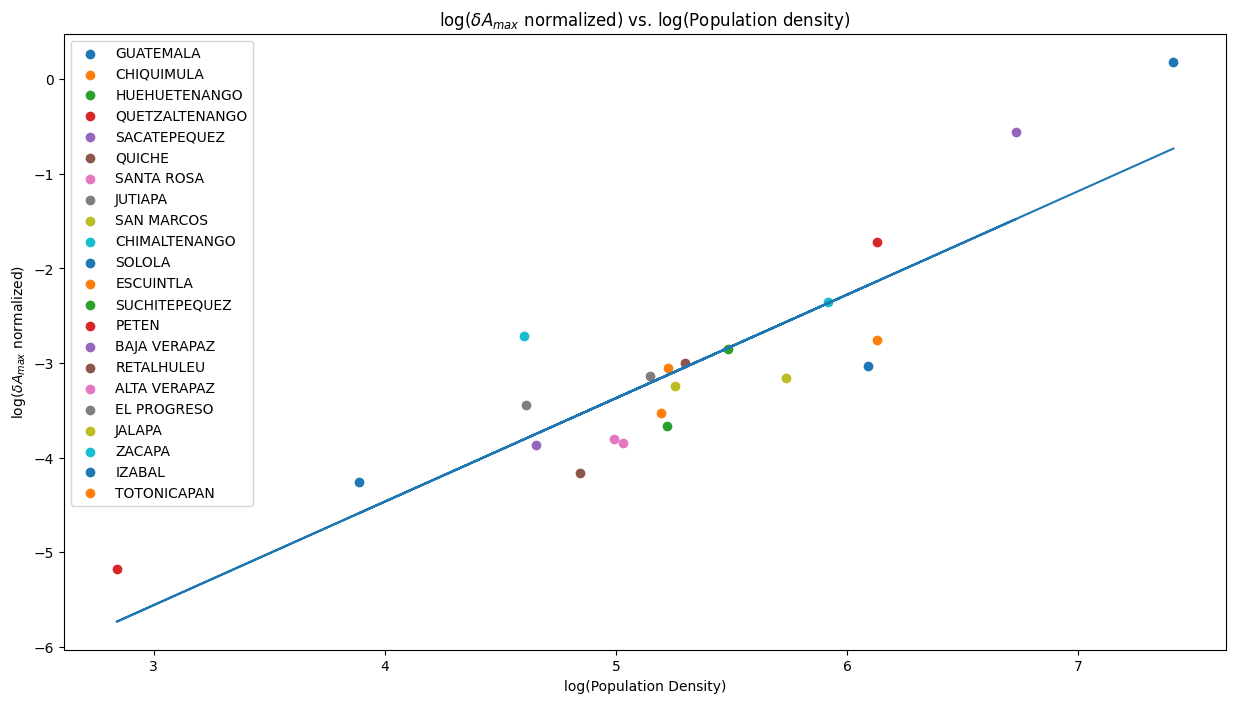

In [22]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(DensidadPoblacional[i]))
    y.append(np.log(np.array(dA_MAX_n[i])))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(DensidadPoblacional[i]), np.log(np.array(dA_MAX_n[i])), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
plt.xlabel("log(Population Density)")
plt.title("log($\delta A_{max}$ normalized) vs. log(Population density)")
plt.ylabel("log($\delta A_{max}$ normalized)")
plt.savefig('Percolacion/'+'DensidadPoblacional.pdf', bbox_inches = 'tight')

plt.show()

In [23]:
slope, intercept, r, p, std_err

(1.0947665555879793,
 -8.844410735727882,
 0.8840901477840667,
 4.8568731620514116e-08,
 0.12939604079412187)

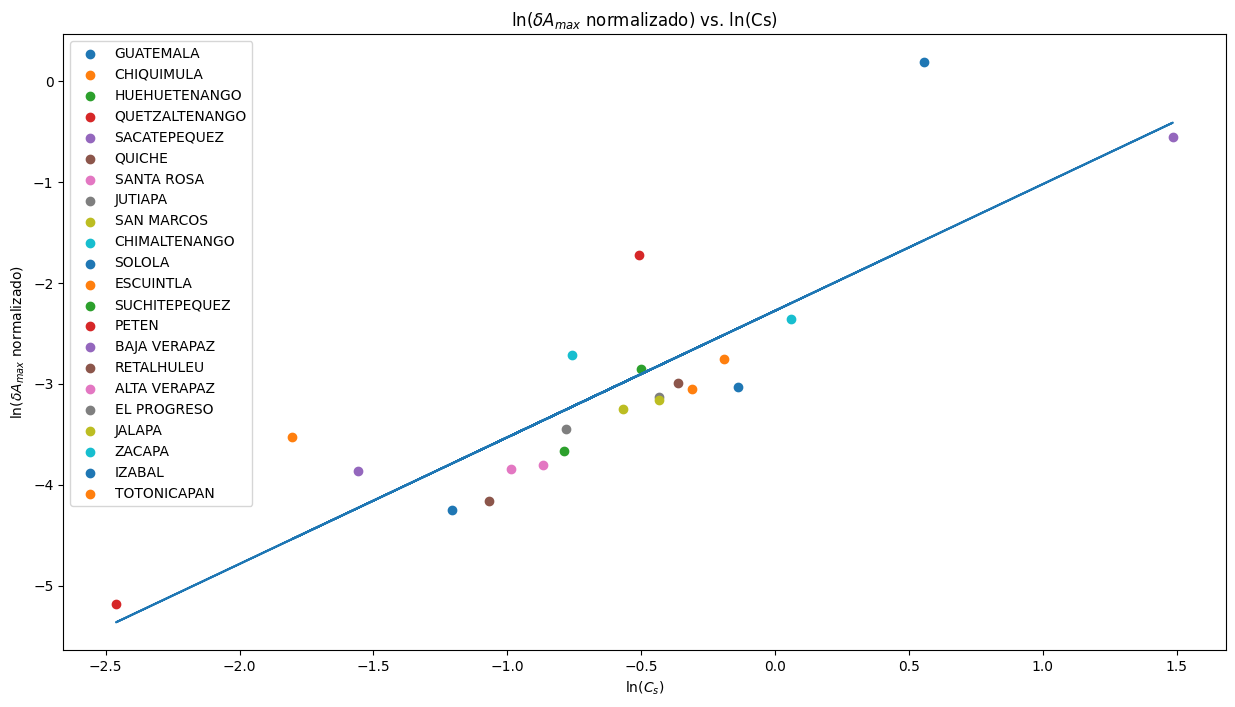

In [27]:
#ESTE
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(Densidad_Calles_superficial1[i]))
    y.append(np.log(np.array(dA_MAX_n[i])))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(Densidad_Calles_superficial1[i]), np.log(np.array(dA_MAX_n[i])), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
#plt.xlabel("Densidad Superficial de Conexiones")
plt.xlabel("ln($C_{s}$)")
plt.title("ln($\delta A_{max}$ normalizado) vs. ln(Cs)")
plt.ylabel("ln($\delta A_{max}$ normalizado)")
plt.savefig('Percolacion/'+'DensidadSuperficialConexiones.pdf', bbox_inches = 'tight')
plt.show()

In [28]:
slope, intercept, r, p, std_err

(1.254477126195903,
 -2.2746497702938853,
 0.8526447899185805,
 4.673698640265742e-07,
 0.17189309611855996)

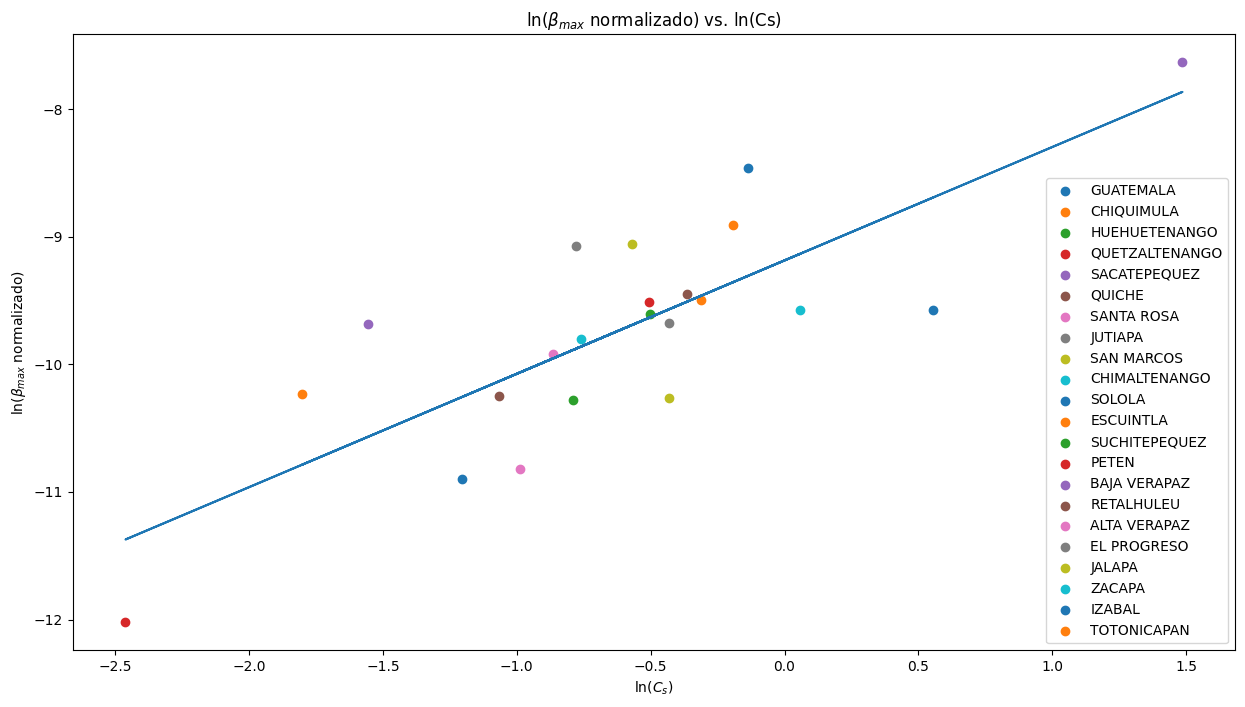

In [29]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(Densidad_Calles_superficial1[i]))
    y.append(np.log(np.array(Beta_MAX_n[i])))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(Densidad_Calles_superficial1[i]), np.log(np.array(Beta_MAX_n[i])), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
#plt.xlabel("Densidad Superficial de Conexiones")
plt.title("ln($\u03B2_{max}$ normalizado) vs. ln(Cs)")
plt.ylabel("ln($\u03B2_{max}$ normalizado)")
plt.xlabel("ln($C_{s}$)")
plt.savefig('Percolacion/'+'DensidadSuperficialConexiones_beta.pdf', bbox_inches = 'tight')
plt.show()

In [30]:
slope, intercept, r, p, std_err

(0.8887600172175636,
 -9.185155089415025,
 0.7954553630715089,
 9.642021812594572e-06,
 0.15140319896793525)

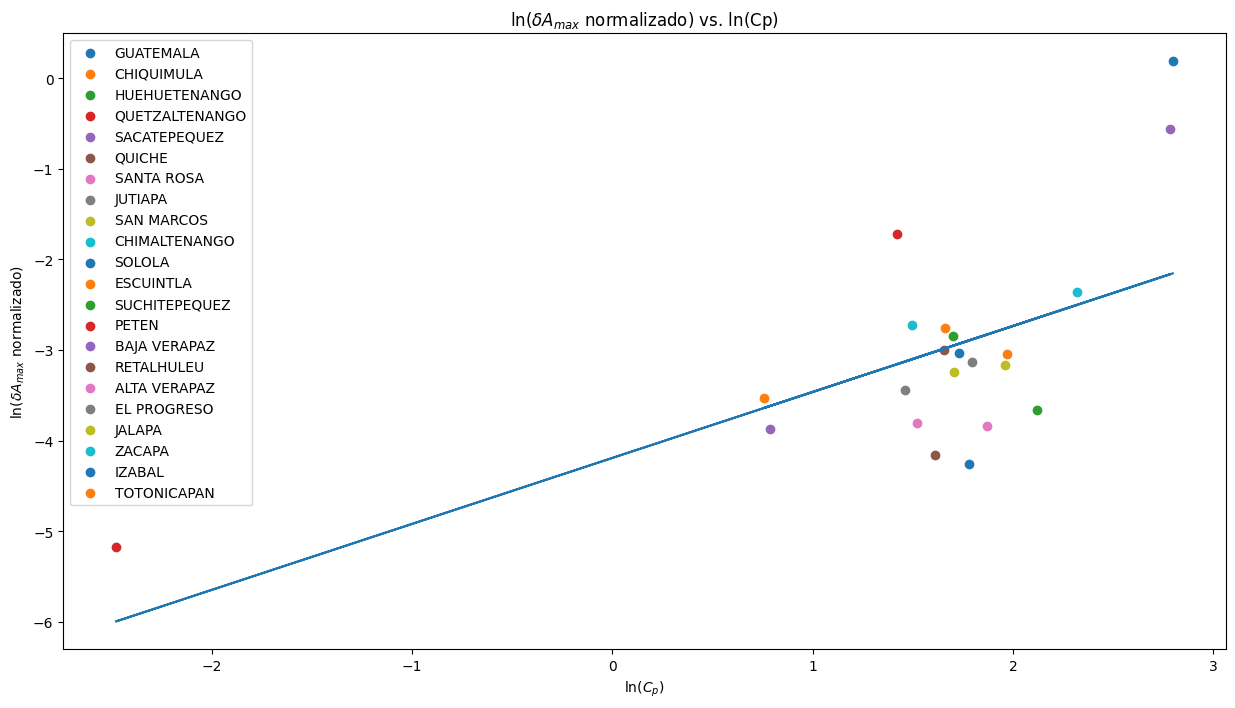

In [31]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(Densidad_Calles_perimetral1[i]))
    y.append(np.log(np.array(dA_MAX_n[i])))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(Densidad_Calles_perimetral1[i]), np.log(np.array(dA_MAX_n[i])), label=NOMBREDEPTO[i])
plt.legend(loc="best")
plt.plot(x, myfunc(x))
#plt.xlabel("Densidad Perimetral de Conexiones")
plt.title("ln($\delta A_{max}$ normalizado) vs. ln(Cp)")
plt.ylabel("ln($\delta A_{max}$ normalizado)")
plt.xlabel("ln($C_{p}$)")
plt.savefig('Percolacion/'+'DensidadPerimetralConexiones.pdf', bbox_inches = 'tight')
plt.show()

In [32]:
slope, intercept, r, p, std_err

(0.7286717212525962,
 -4.191971060559958,
 0.6356229744169489,
 0.0014774764155894302,
 0.19789481961750433)

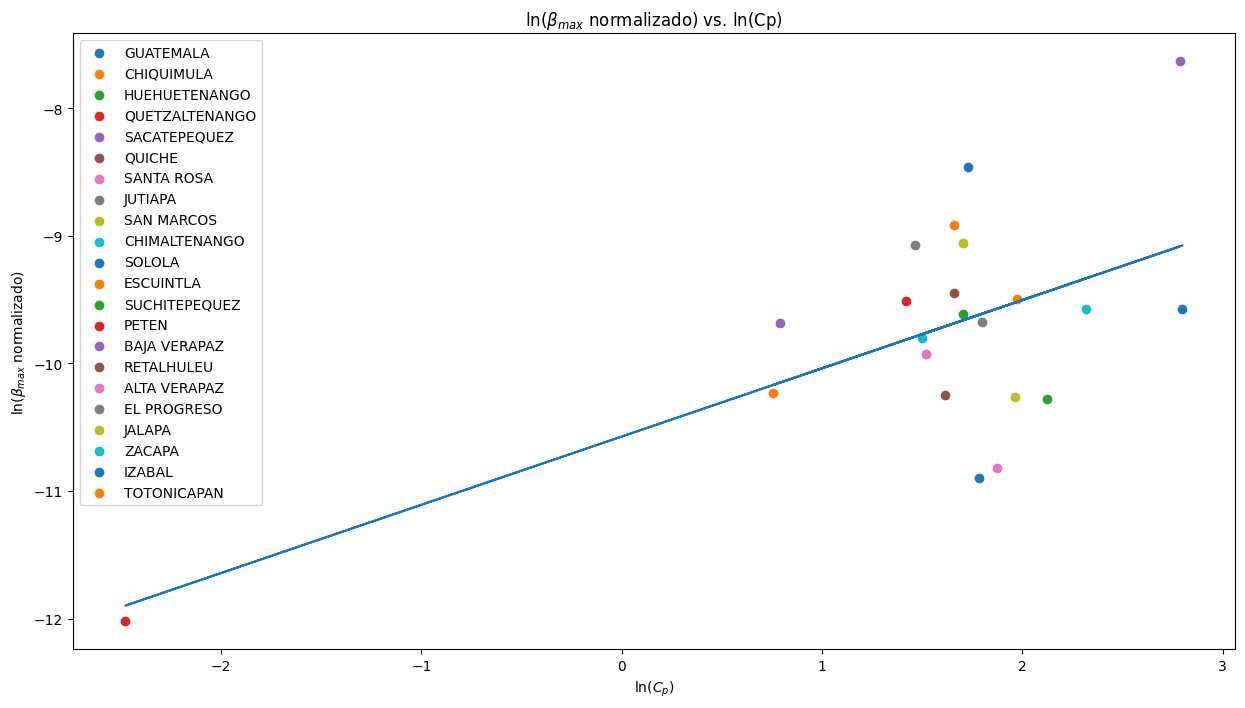

In [33]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(Densidad_Calles_perimetral1[i]))
    y.append(np.log(np.array(Beta_MAX_n[i])))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(Densidad_Calles_perimetral1[i]), np.log(np.array(Beta_MAX_n[i])), label=NOMBREDEPTO[i])
plt.legend(loc="best")
plt.plot(x, myfunc(x))
#plt.xlabel("Densidad Perimetral de Conexiones")
plt.title("ln($\u03B2_{max}$ normalizado) vs. ln(Cp)")
plt.ylabel("ln($\u03B2_{max}$ normalizado)")
plt.xlabel("ln($C_{p}$)")
plt.savefig('Percolacion/'+'DensidadPerimetralConexiones_beta.pdf', bbox_inches = 'tight')
plt.show()

In [34]:
slope, intercept, r, p, std_err

(0.5349183733529416,
 -10.572757362244005,
 0.6144422854883678,
 0.0023462047325059333,
 0.15358449788214268)

In [32]:
NOMBREDEPTO

['GUATEMALA',
 'CHIQUIMULA',
 'HUEHUETENANGO',
 'QUETZALTENANGO',
 'SACATEPEQUEZ',
 'QUICHE',
 'SANTA ROSA',
 'JUTIAPA',
 'SAN MARCOS',
 'CHIMALTENANGO',
 'SOLOLA',
 'ESCUINTLA',
 'SUCHITEPEQUEZ',
 'PETEN',
 'BAJA VERAPAZ',
 'RETALHULEU',
 'ALTA VERAPAZ',
 'EL PROGRESO',
 'JALAPA',
 'ZACAPA',
 'IZABAL',
 'TOTONICAPAN']

In [33]:
NOMBREDEPTO1 = ["HUEHUETENANGO", "QUICHE", "ALTA VERAPAZ", "PETEN", "IZABAL", "SAN MARCOS", "QUETZALTENANGO", "TOTONICAPAN",
              "SOLOLA", "CHIMALTENANGO", "BAJA VERAPAZ", "EL PROGRESO", "ZACAPA", "GT", "JALAPA", "CHIQUIMULA", "SACATEPEQUEZ",
              "RETALHULEU", "SUCHITEPEQUEZ", "ESCUINTLA", "SANTA ROSA", "JUTIAPA"]

In [34]:
NOMBREDEPTO1 = [0, 1, 2, 3, 4, 5, 6, 7,
              8, 9, 10, 11, 12, 13, 14, 15, 16,
              17, 18, 19, 20, 21]

In [35]:
#Para el otro tipo de conexion
##############################

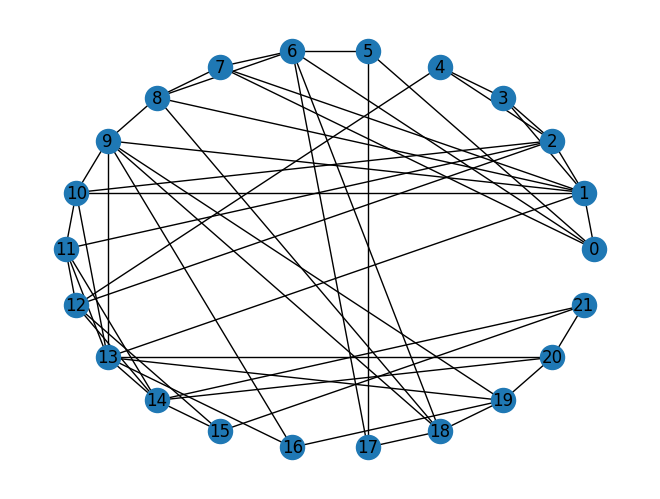

In [36]:
#crear la matriz de adyacencia con numpy y a partir de ello la red.
Matriz =  np.array([[0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0],
                    [0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0],
                    [0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],#
                    [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                    [1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0],
                    [1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                    [0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
                    [0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0],#
                    [0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0],
                    [0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0],
                    [0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0],
                    [0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0],
                    [0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,1], #
                    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1],
                    [0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0],
                    [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                    [0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0],
                    [0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0],#
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0]]
               )

G = nx.from_numpy_array(Matriz)
nx.draw_circular(G, with_labels=True)
plt.show()

In [37]:
#Transformar la matriz anterior para que tenga el mismo los departamentos en el mismo orden como aparecen en 
#NOMBREDEPTO 

#FILA 13 PASA A FILA 0
Matriz2 = []
Matriz2.append(Matriz[13])
Matriz2.append(Matriz[15])
Matriz2.append(Matriz[0])
Matriz2.append(Matriz[6])
Matriz2.append(Matriz[16])
Matriz2.append(Matriz[1])
Matriz2.append(Matriz[20])
Matriz2.append(Matriz[21])
Matriz2.append(Matriz[5])
Matriz2.append(Matriz[9])
Matriz2.append(Matriz[8])
Matriz2.append(Matriz[19])
Matriz2.append(Matriz[18])
Matriz2.append(Matriz[3])
Matriz2.append(Matriz[10])
Matriz2.append(Matriz[17])
Matriz2.append(Matriz[2])
Matriz2.append(Matriz[11])
Matriz2.append(Matriz[14])
Matriz2.append(Matriz[12])
Matriz2.append(Matriz[4])
Matriz2.append(Matriz[7])


In [38]:
cambio = [13,15,0,6,16,1,20,21,5,9,8,19,18,3,10,17,2,11,14,12,4,7]

In [39]:
Matriz2  = np.array(Matriz2)
#Matriz2

In [40]:
Matriz3 = np.transpose(Matriz2)

In [41]:
#Matriz3

In [42]:
Matriz4 = []
Matriz4.append(Matriz3[13])
Matriz4.append(Matriz3[15])
Matriz4.append(Matriz3[0])
Matriz4.append(Matriz3[6])
Matriz4.append(Matriz3[16])
Matriz4.append(Matriz3[1])
Matriz4.append(Matriz3[20])
Matriz4.append(Matriz3[21])
Matriz4.append(Matriz3[5])
Matriz4.append(Matriz3[9])
Matriz4.append(Matriz3[8])
Matriz4.append(Matriz3[19])
Matriz4.append(Matriz3[18])
Matriz4.append(Matriz3[3])
Matriz4.append(Matriz3[10])
Matriz4.append(Matriz3[17])
Matriz4.append(Matriz3[2])
Matriz4.append(Matriz3[11])
Matriz4.append(Matriz3[14])
Matriz4.append(Matriz3[12])
Matriz4.append(Matriz3[4])
Matriz4.append(Matriz3[7])


In [43]:
Matriz4 = np.array(Matriz4)
#Matriz4

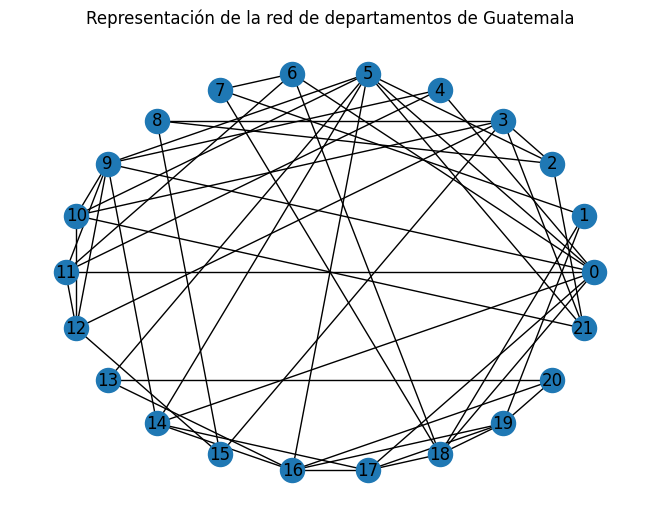

In [44]:
G = nx.from_numpy_array(Matriz4)
nx.draw_circular(G, with_labels=True)
plt.title("Representación de la red de departamentos de Guatemala")
plt.savefig('imagenes/'+'Red_Departamentos.pdf', bbox_inches = 'tight')
plt.show()

In [45]:
print(nx.betweenness_centrality(G))

{0: 0.22577084291370006, 1: 0.007709750566893425, 2: 0.07550124478695909, 3: 0.04999738356881213, 4: 0.0, 5: 0.3183177933177933, 6: 0.06193126978841264, 7: 0.006782106782106783, 8: 0.005747427175998605, 9: 0.1159428402285545, 10: 0.04539748611177184, 11: 0.08164930307787449, 12: 0.1107940472226187, 13: 0.022779812779812787, 14: 0.03591371591371592, 15: 0.010090702947845805, 16: 0.11268918911776056, 17: 0.03450404093261236, 18: 0.10920478991907565, 19: 0.06380814952243524, 20: 0.007312925170068027, 21: 0.01720279720279721}


In [46]:
CONECTIVIDAD = nx.betweenness_centrality(G)
#funciona con closeness y degree
DENSIDAD_CONECTIVIDAD = []
for i in range(len(NOMBREDEPTO)):
    DENSIDAD_CONECTIVIDAD.append(CONECTIVIDAD[i])
DENSIDAD_CONECTIVIDAD = np.array(DENSIDAD_CONECTIVIDAD)
DENSIDAD_CONECTIVIDAD = DENSIDAD_CONECTIVIDAD/npSuperficie

In [47]:
DENSIDAD_CONECTIVIDAD

array([1.06195128e-04, 3.24484451e-06, 1.02028709e-05, 2.56002988e-05,
       0.00000000e+00, 3.79944848e-05, 2.06782203e-05, 2.10886405e-06,
       1.51607153e-06, 5.85865792e-05, 4.27874516e-05, 1.86243848e-05,
       4.41410547e-05, 6.35349271e-07, 1.14960678e-05, 5.43680116e-06,
       1.29736575e-05, 1.79521545e-05, 5.29349442e-05, 2.37205017e-05,
       8.09130911e-07, 1.62137580e-05])

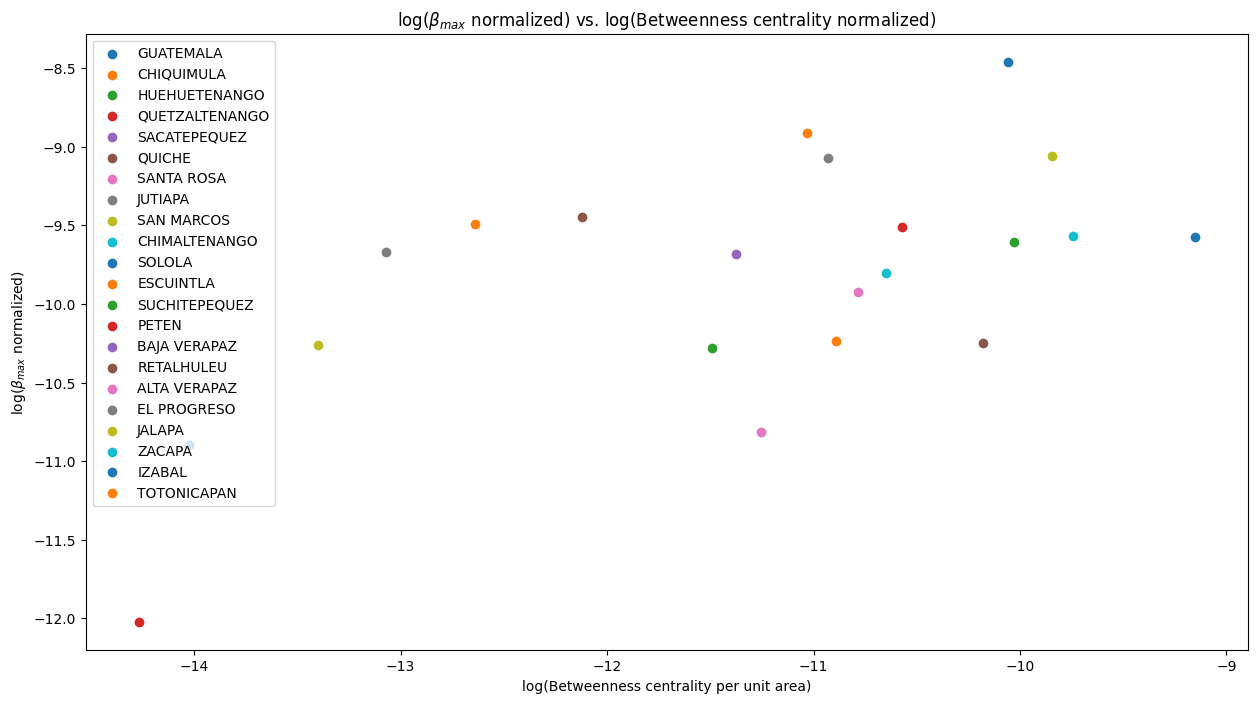

In [48]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(DENSIDAD_CONECTIVIDAD[i]))
    y.append(np.log(Beta_MAX_n[i]))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(DENSIDAD_CONECTIVIDAD[i]), np.log(Beta_MAX_n[i]), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
#plt.xlabel("Densidad Superficial de Conexiones")
plt.title("log($\u03B2_{max}$ normalized) vs. log(Betweenness centrality normalized)")
plt.ylabel("log($\u03B2_{max}$ normalized)")
plt.xlabel("log(Betweenness centrality per unit area)")
plt.savefig('Percolacion/'+'DensidadSuperficial_betweenness_beta.pdf', bbox_inches = 'tight')
plt.show()

In [49]:
slope, intercept, r, p, std_err

(nan, nan, nan, nan, nan)

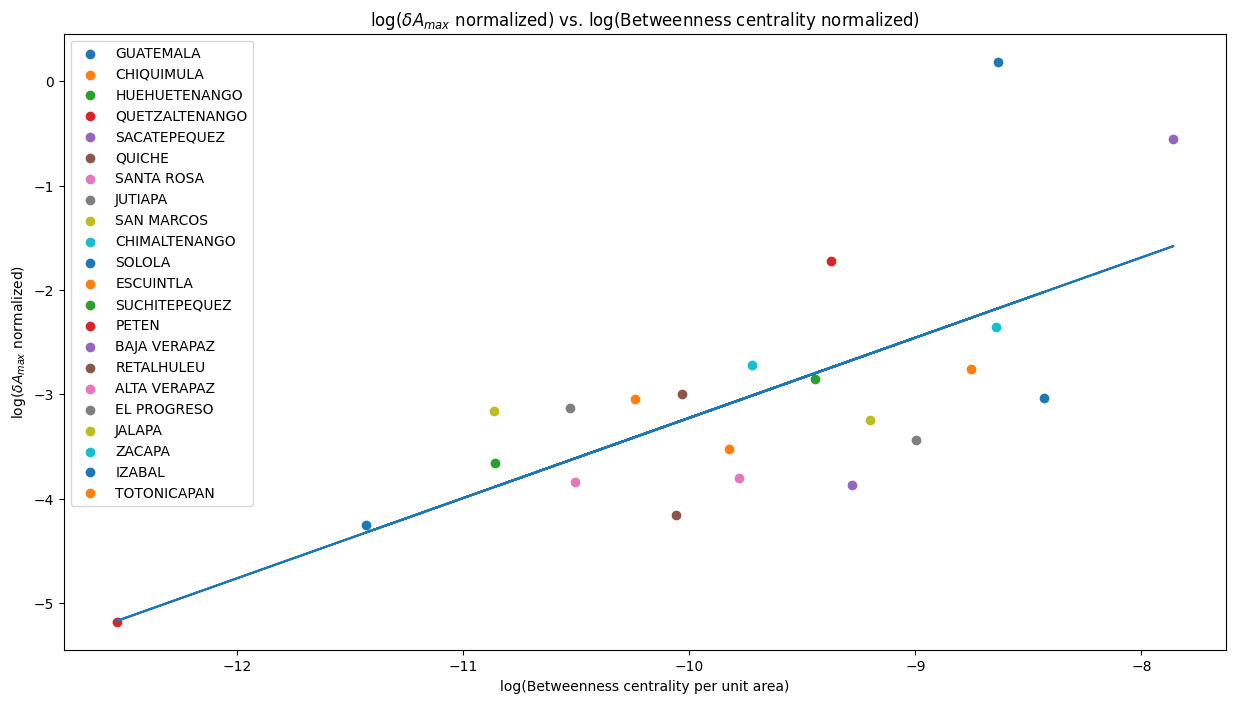

In [65]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(DENSIDAD_CONECTIVIDAD[i]))
    y.append(np.log(dA_MAX_n[i]))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(DENSIDAD_CONECTIVIDAD[i]), np.log(dA_MAX_n[i]), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
#plt.xlabel("Densidad Superficial de Conexiones")
plt.title("log($\delta A_{max}$ normalized) vs. log(Betweenness centrality normalized)")
plt.ylabel("log($\delta A_{max}$ normalized)")
plt.xlabel("log(Betweenness centrality per unit area)")
plt.savefig('Percolacion/'+'DensidadSuperficial_betweenness_dA.pdf', bbox_inches = 'tight')
plt.show()

In [51]:
slope, intercept, r, p, std_err

(nan, nan, nan, nan, nan)

In [52]:
#closeness

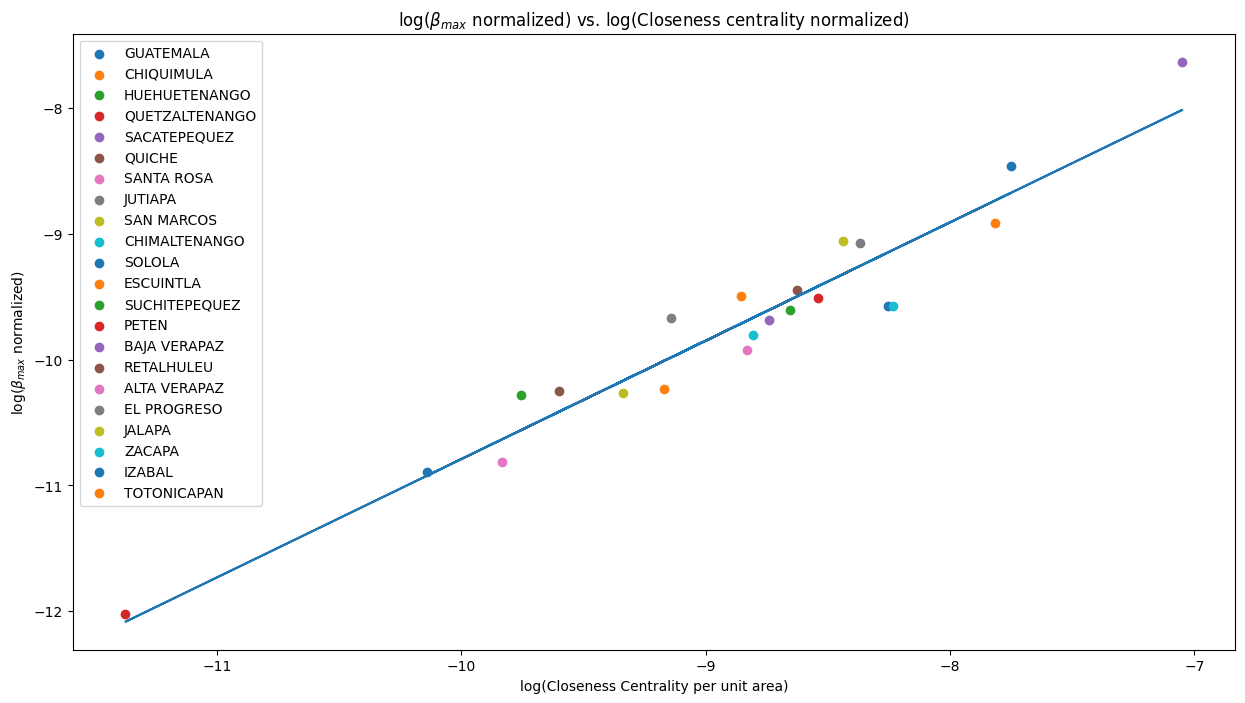

In [53]:
#ESTE
CONECTIVIDAD = nx.closeness_centrality(G)
#funciona con closeness y degree
DENSIDAD_CONECTIVIDAD = []
for i in range(len(NOMBREDEPTO)):
    DENSIDAD_CONECTIVIDAD.append(CONECTIVIDAD[i])
DENSIDAD_CONECTIVIDAD = np.array(DENSIDAD_CONECTIVIDAD)
DENSIDAD_CONECTIVIDAD = DENSIDAD_CONECTIVIDAD/npSuperficie

from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(DENSIDAD_CONECTIVIDAD[i]))
    y.append(np.log(Beta_MAX_n[i]))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(DENSIDAD_CONECTIVIDAD[i]), np.log(Beta_MAX_n[i]), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
plt.title("log($\u03B2_{max}$ normalized) vs. log(Closeness centrality normalized)")
plt.ylabel("log($\u03B2_{max}$ normalized)")
plt.xlabel("log(Closeness Centrality per unit area)")
plt.savefig('Percolacion/'+'DensidadSuperficial_closeness_beta.pdf', bbox_inches = 'tight')
plt.show()

In [54]:
slope, intercept, r, p, std_err

(0.9403953467131967,
 -1.3865909287624092,
 0.9651961008472115,
 4.076453089077914e-13,
 0.05697663709740892)

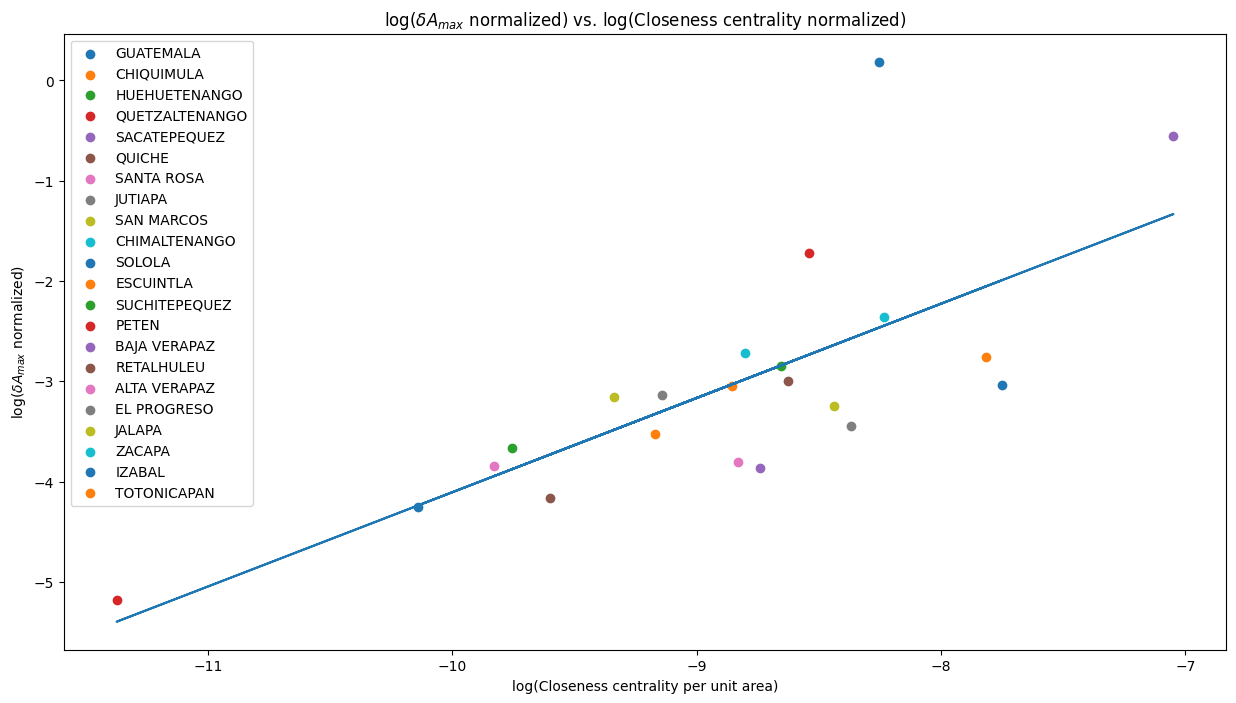

In [55]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(DENSIDAD_CONECTIVIDAD[i]))
    y.append(np.log(dA_MAX_n[i]))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(DENSIDAD_CONECTIVIDAD[i]), np.log(dA_MAX_n[i]), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
#plt.xlabel("Densidad Superficial de Conexiones")
plt.title("log($\delta A_{max}$ normalized) vs. log(Closeness centrality normalized)")
plt.ylabel("log($\delta A_{max}$ normalized)")
plt.xlabel("log(Closeness centrality per unit area)")

plt.savefig('Percolacion/'+'DensidadSuperficial_closeness_dA.pdf', bbox_inches = 'tight')
plt.show()

In [56]:
slope, intercept, r, p, std_err

(0.9397855173213298,
 5.292097077513253,
 0.7325005000371788,
 0.00010602526105152774,
 0.19530078829724556)

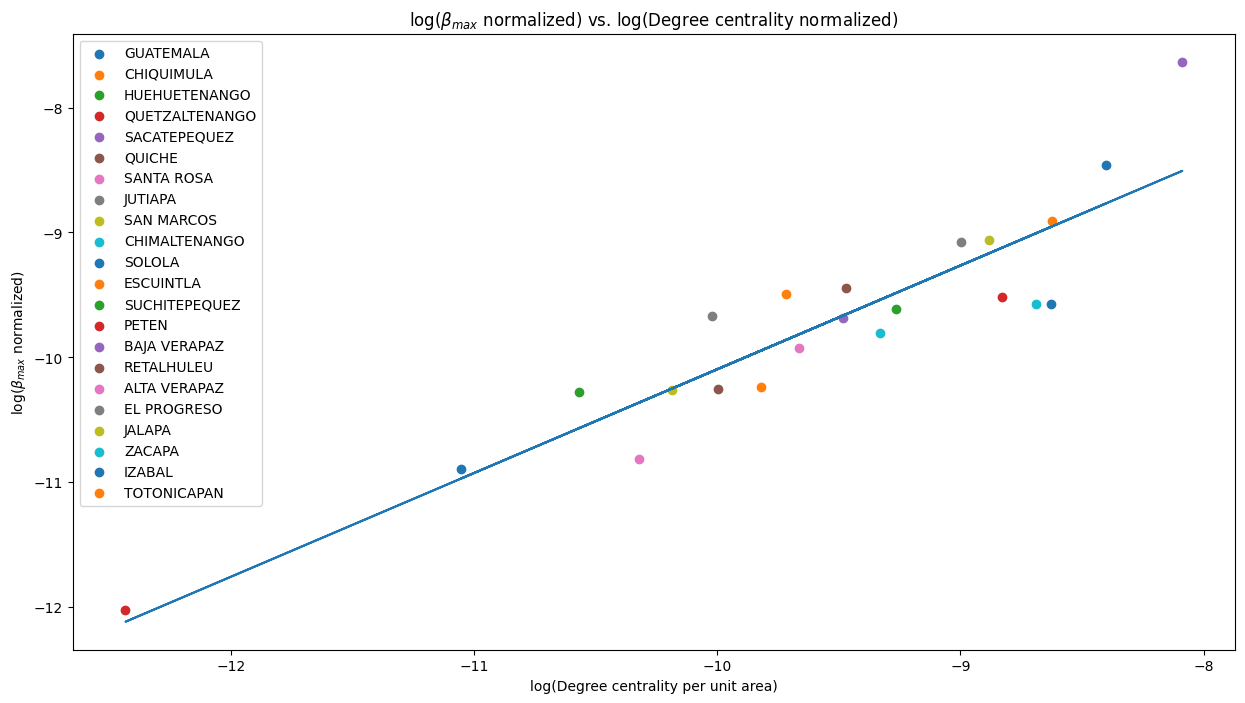

In [57]:
#ESTE
CONECTIVIDAD = nx.degree_centrality(G)
#funciona con closeness y degree
DENSIDAD_CONECTIVIDAD = []
for i in range(len(NOMBREDEPTO)):
    DENSIDAD_CONECTIVIDAD.append(CONECTIVIDAD[i])
DENSIDAD_CONECTIVIDAD = np.array(DENSIDAD_CONECTIVIDAD)
DENSIDAD_CONECTIVIDAD = DENSIDAD_CONECTIVIDAD/npSuperficie

from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(DENSIDAD_CONECTIVIDAD[i]))
    y.append(np.log(Beta_MAX_n[i]))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(DENSIDAD_CONECTIVIDAD[i]), np.log(Beta_MAX_n[i]), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
plt.title("log($\u03B2_{max}$ normalized) vs. log(Degree centrality normalized)")
plt.ylabel("log($\u03B2_{max}$ normalized)")
plt.xlabel("log(Degree centrality per unit area)")
plt.savefig('Percolacion/'+'DensidadSuperficial_degree_beta.pdf', bbox_inches = 'tight')
plt.show()

In [58]:
slope, intercept, r, p, std_err

(0.830817775419162,
 -1.7867409800416842,
 0.9177811415940996,
 1.8085787517448093e-09,
 0.08037794440461865)

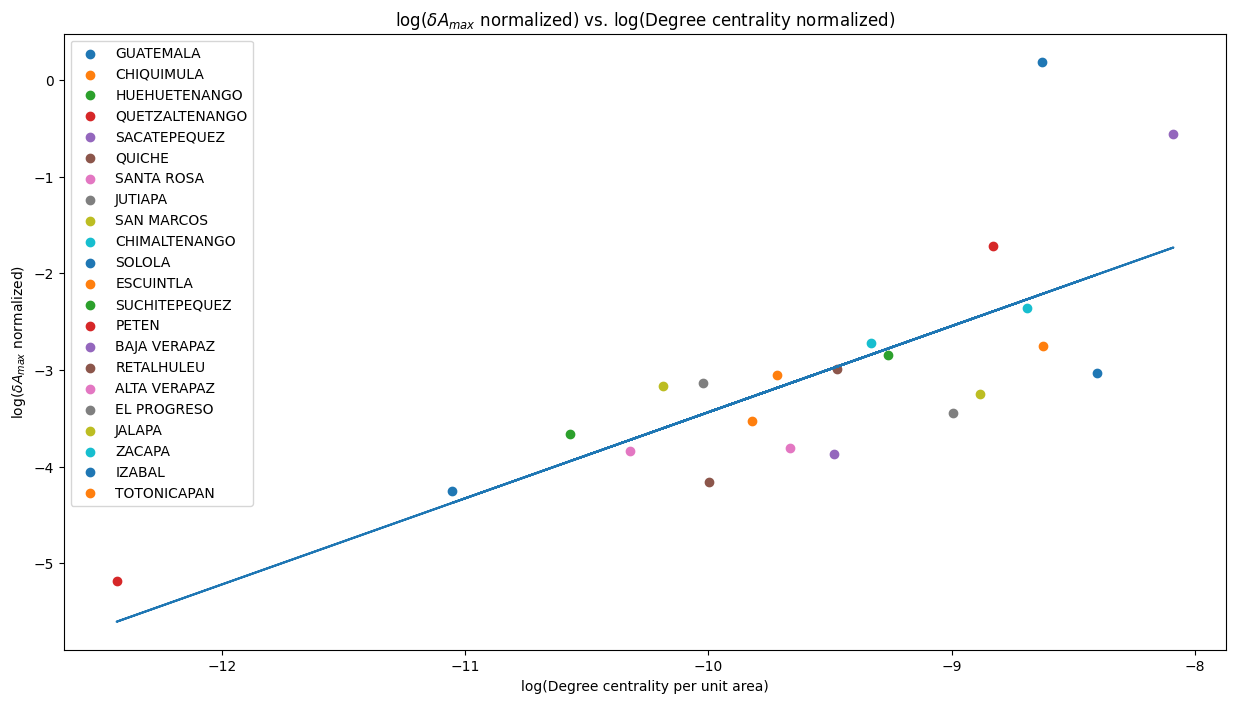

In [59]:

from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(DENSIDAD_CONECTIVIDAD[i]))
    y.append(np.log(dA_MAX_n[i]))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(DENSIDAD_CONECTIVIDAD[i]), np.log(dA_MAX_n[i]), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
plt.title("log($\delta A_{max}$ normalized) vs. log(Degree centrality normalized)")
plt.ylabel("log($\delta A_{max}$ normalized)")
plt.xlabel("log(Degree centrality per unit area)")
plt.savefig('Percolacion/'+'DensidadSuperficial_degree_dA.pdf', bbox_inches = 'tight')
plt.show()

In [60]:
slope, intercept, r, p, std_err

(0.8904427609553072,
 5.467806362265817,
 0.7469876947357997,
 6.493409616963116e-05,
 0.17721207338584757)

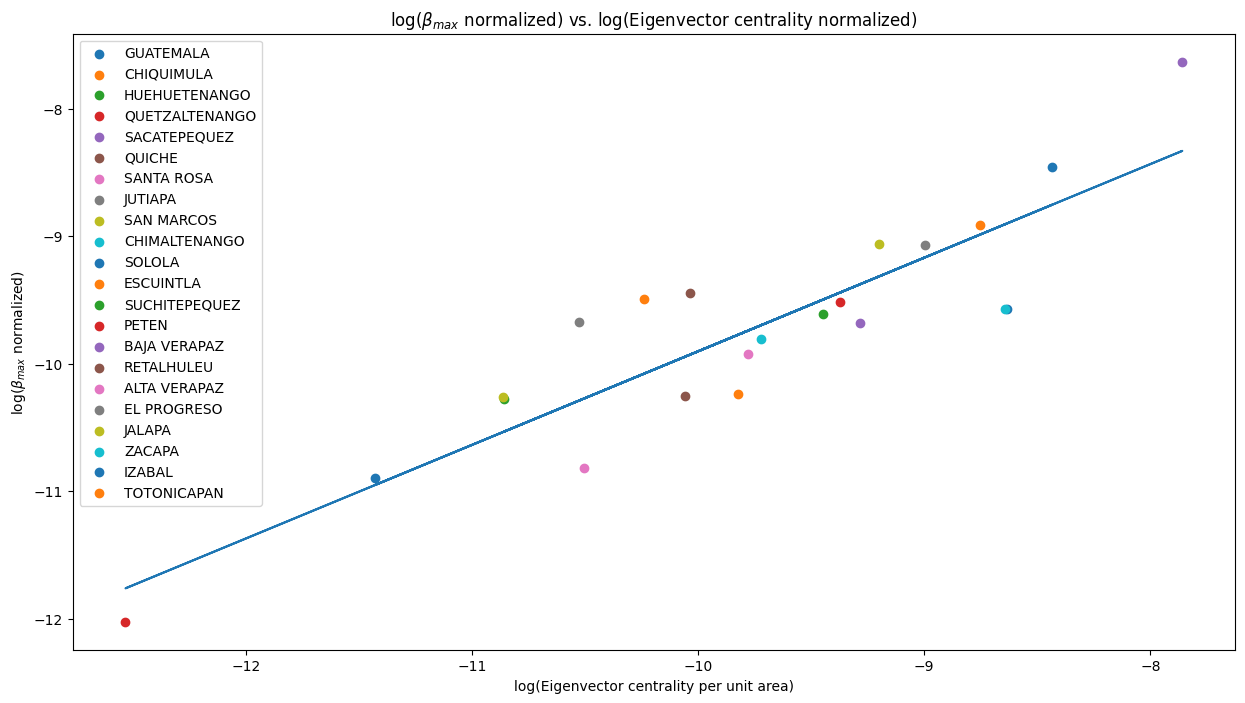

In [61]:
#ESTE
CONECTIVIDAD = nx.eigenvector_centrality(G)
#funciona con closeness y degree
DENSIDAD_CONECTIVIDAD = []
for i in range(len(NOMBREDEPTO)):
    DENSIDAD_CONECTIVIDAD.append(CONECTIVIDAD[i])
DENSIDAD_CONECTIVIDAD = np.array(DENSIDAD_CONECTIVIDAD)
DENSIDAD_CONECTIVIDAD = DENSIDAD_CONECTIVIDAD/npSuperficie

from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(DENSIDAD_CONECTIVIDAD[i]))
    y.append(np.log(Beta_MAX_n[i]))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(DENSIDAD_CONECTIVIDAD[i]), np.log(Beta_MAX_n[i]), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
plt.title("log($\u03B2_{max}$ normalized) vs. log(Eigenvector centrality normalized)")
plt.ylabel("log($\u03B2_{max}$ normalized)")
plt.xlabel("log(Eigenvector centrality per unit area)")
plt.savefig('Percolacion/'+'DensidadSuperficial_eigen_beta.pdf', bbox_inches = 'tight')
plt.show()

In [62]:
slope, intercept, r, p, std_err

(0.7336759257552403,
 -2.565854720211955,
 0.8905423774269846,
 2.8161033468649884e-08,
 0.08380132667632428)

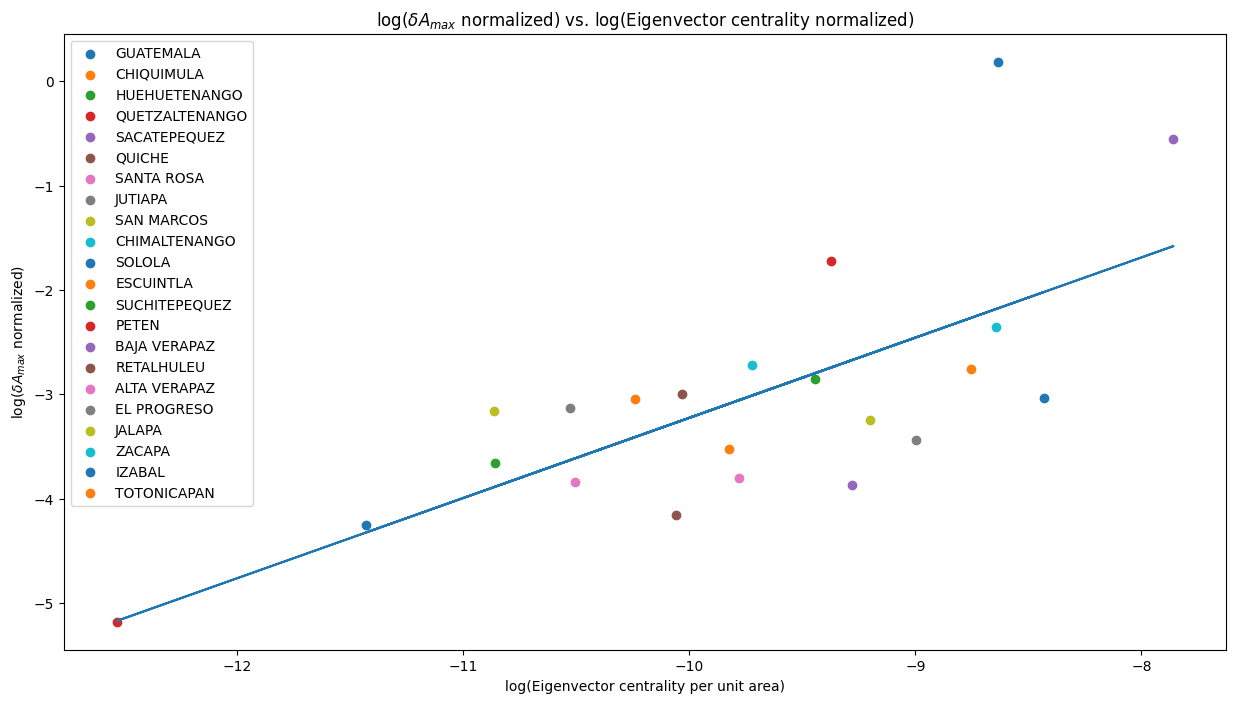

In [63]:
from matplotlib.pyplot import figure
#PARA ESTAS COMPARACIONES HAY QUE NORMALIZAR LOS DATOS
#figure(figsize=(7, 4), dpi=100)
x = []
y = []
for i in range(len(NOMBREDEPTO)):
    x.append(np.log(DENSIDAD_CONECTIVIDAD[i]))
    y.append(np.log(dA_MAX_n[i]))


slope, intercept, r, p, std_err = stats.linregress(x, y)


fig, ax = plt.subplots(figsize=(15, 8))
for i in range(len(NOMBREDEPTO)):
    plt.scatter(np.log(DENSIDAD_CONECTIVIDAD[i]), np.log(dA_MAX_n[i]), label=NOMBREDEPTO[i])
plt.legend(loc="best")
#clb =  plt.colorbar()
plt.plot(x, myfunc(x))
plt.title("log($\delta A_{max}$ normalized) vs. log(Eigenvector centrality normalized)")
plt.ylabel("log($\delta A_{max}$ normalized)")
plt.xlabel("log(Eigenvector centrality per unit area)")
plt.savefig('Percolacion/'+'DensidadSuperficial_eigen_dA.pdf', bbox_inches = 'tight')
plt.show()

In [64]:
slope, intercept, r, p, std_err

(0.7688166836234702,
 4.461643800021621,
 0.7086751613228466,
 0.0002228658605735023,
 0.17115086581288855)